In [4]:
import numpy as np
import cv2
from skimage import io
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

import matplotlib.pyplot as plt

from pathlib import Path
import json
import matplotlib.patches as patches
import time



# get 20 pics

In [5]:
def save_image(image,addr,num):
    address = addr + str(num)+ '.jpg'
    cv2.imwrite(address,image)
    
  
# 读取视频文件
cap = cv2.VideoCapture("./video/p4.mp4")
# 通过摄像头的方式
# videoCapture=cv2.VideoCapture(1)
  
#读帧
i = 1

while(cap.isOpened()):  
    ret, frame = cap.read()
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    if i%5==1 and frame is not None:
        cv2.imshow('frame',frame)
        save_image(frame,'./data/pics/img', int(i/5))
        print ("\r saving image {} ".format(int(i/5)), end="")
    i = i + 1

    if i ==400:
        break

cap.release()
cv2.destroyAllWindows()
print("done")

 saving image 75 done


# analyze hsv

In [38]:
# load 20 pics

PIC = []

for i in range(0,20):
    File_path = "./data/20pics/"
    img = cv2.imread(File_path+'/img%d.jpg'%(i))
    img = cv2.resize(img, (800, 450))
    PIC.append(img)

PIC = np.asarray(PIC, dtype=np.uint8)

print(PIC.shape, PIC.dtype)


#get tiles

tile_all = []

with open('./config/rect_vertices_2_calib_samesize.json', 'r') as rect_file:
    rect = json.load(rect_file)
for i in range(0,20):
    img = PIC[i]
    temp_tile = []
#     print(img.shape)
    for vertice in rect['vertices']:
        left_top = rect['vertices'][vertice]['left_top']
        right_bottom = rect['vertices'][vertice]['right_bottom']
        img_tile = img[int(left_top[1]):int(right_bottom[1]), int(left_top[0]):int(right_bottom[0]), :]
        img_1 = cv2.cvtColor(img_tile, cv2.COLOR_BGR2HSV)
        img_1 = img_1.astype(np.float64)
        img_1[:,:,1] = np.clip(img_1[:,:,1] * 22 / np.mean(img_1[:,:,1]),0,255)
        img_1[:,:,2] = np.clip(img_1[:,:,2] * 120 / np.mean(img_1[:,:,2]),0,255)
#         img_1 = cv2.cvtColor(img_1.astype(np.uint8), cv2.COLOR_HSV2BGR)
#         tile_hsv = cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV)
        temp_tile.append(img_1.astype(np.uint8))
    tile_all.append(temp_tile)
# dimension image,tile,tile size, B G R channels 
tile_all = np.asarray(tile_all, dtype=np.uint8)

print(tile_all.shape)

(20, 450, 800, 3) uint8
(20, 12, 80, 75, 3)


(20, 12, 2)
[[[ 21.50366667 119.48466667]
  [ 21.59716667 119.52816667]
  [ 21.5125     119.5045    ]
  [ 21.49833333 119.53133333]
  [ 21.49433333 119.48983333]
  [ 21.431      119.52316667]
  [ 21.4555     119.504     ]
  [ 21.5095     119.48883333]
  [ 21.53683333 119.49883333]
  [ 21.47033333 119.47716667]
  [ 21.51966667 119.5045    ]
  [ 21.3435     119.49933333]]

 [[ 21.50366667 119.48466667]
  [ 21.59716667 119.52816667]
  [ 21.5125     119.5045    ]
  [ 21.49833333 119.53133333]
  [ 21.49433333 119.48983333]
  [ 21.431      119.52316667]
  [ 21.4555     119.504     ]
  [ 21.5095     119.48883333]
  [ 21.53683333 119.49883333]
  [ 21.47033333 119.47716667]
  [ 21.51966667 119.5045    ]
  [ 21.3435     119.49933333]]

 [[ 21.50366667 119.48466667]
  [ 21.59716667 119.52816667]
  [ 21.5125     119.5045    ]
  [ 21.49833333 119.53133333]
  [ 21.49433333 119.48983333]
  [ 21.431      119.52316667]
  [ 21.4555     119.504     ]
  [ 21.5095     119.48883333]
  [ 21.53683333 119.4988

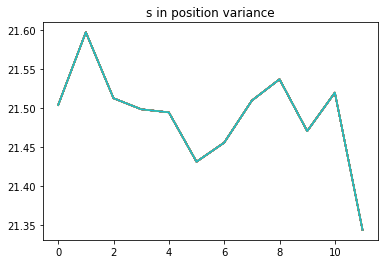

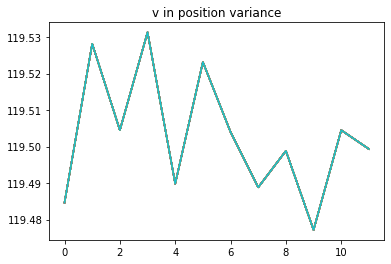

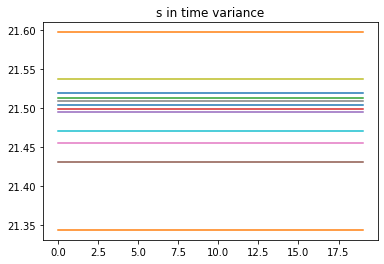

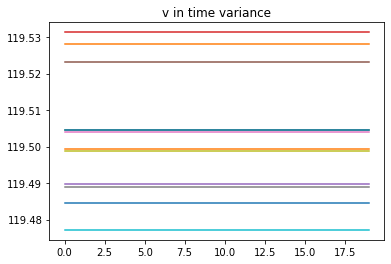

In [39]:
# find s v change in time and position variance



sv = []
for i in range(0, tile_all.shape[0]): #time
    temp_tile = tile_all[i]
#     print(temp_tile.shape)
    sv_temp = []
    for j in range(0, tile_all.shape[1]): #position
        tile = temp_tile[j]
#         print(tile.shape)
        # average s v
        s_mean = np.mean(tile[:,:,1])
        v_mean = np.mean(tile[:,:,2])
        sv_temp.append([s_mean, v_mean])
    sv.append(sv_temp)
sv = np.asarray(sv)
print(sv.shape)
print(sv)
plt.figure()
plt.title("s in position variance")
# plt.legend()
for i in range(0, tile_all.shape[0]):
    plt.plot(sv[i,:,0])
#     print(sv[i,:,0])
    
plt.figure()
plt.title("v in position variance")
# plt.legend()
for i in range(0, tile_all.shape[0]):
    plt.plot(sv[i,:,1])
    
plt.figure()
plt.title("s in time variance")
# plt.legend()
for i in range(0, tile_all.shape[1]):
    plt.plot(sv[:,i,0])
    
plt.figure()
plt.title("v in time variance")
# plt.legend()
for i in range(0, tile_all.shape[1]):
    plt.plot(sv[:,i,1])
        
        
    
    
    
